In [1]:
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.utils import to_categorical
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import load_model
from keras.callbacks import ModelCheckpoint, EarlyStopping
%matplotlib inline

Using TensorFlow backend.


In [2]:
seed=2020
np.random.seed(seed)
tf.random.set_seed(seed)

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
len(train_labels)

60000

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
len(test_labels)

10000

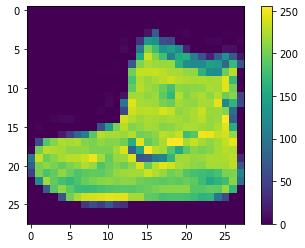

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [11]:
unique, counts=np.unique(train_labels,return_counts=True)
dict(zip(unique,counts))

{0: 6000,
 1: 6000,
 2: 6000,
 3: 6000,
 4: 6000,
 5: 6000,
 6: 6000,
 7: 6000,
 8: 6000,
 9: 6000}

In [12]:
x_train = train_images.reshape(-1,28,28,1).astype("float32") / 255.0

x_test = test_images.reshape(-1,28,28,1).astype("float32") / 255.0

In [13]:
y_train=keras.utils.to_categorical(train_labels)
y_test=keras.utils.to_categorical(test_labels)

In [14]:
# 컨볼루션 신경망 설정
model = Sequential([
    Conv2D(32, kernel_size=(5, 5), input_shape=(28, 28,1), activation='relu'),
    MaxPooling2D(pool_size=2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)              

In [15]:
model.compile(loss="categorical_crossentropy",
             optimizer='adam',
             metrics=['accuracy'])

In [16]:
# 모델 최적화 설정
MODEL_DIR='./model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [17]:
modelpath=MODEL_DIR+"fashion-cnn.hdf5"
checkpointer=ModelCheckpoint(filepath=modelpath,monitor="val_loss",
                            verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [18]:
# 모델의 실행
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=30,
                  batch_size=200,
                  callbacks=[early_stopping_callback, checkpointer])

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 16s 272us/step - loss: 0.8104 - accuracy: 0.7056 - val_loss: 0.4639 - val_accuracy: 0.8323

Epoch 00001: val_loss improved from inf to 0.46392, saving model to ./model/fashion-cnn.hdf5
Epoch 2/30
60000/60000 [==============================] - 16s 269us/step - loss: 0.5055 - accuracy: 0.8218 - val_loss: 0.3972 - val_accuracy: 0.8529

Epoch 00002: val_loss improved from 0.46392 to 0.39721, saving model to ./model/fashion-cnn.hdf5
Epoch 3/30
60000/60000 [==============================] - 16s 265us/step - loss: 0.4369 - accuracy: 0.8482 - val_loss: 0.3554 - val_accuracy: 0.8696

Epoch 00003: val_loss improved from 0.39721 to 0.35537, saving model to ./model/fashion-cnn.hdf5
Epoch 4/30
60000/60000 [==============================] - 16s 263us/step - loss: 0.3948 - accuracy: 0.8610 - val_loss: 0.3189 - val_accuracy: 0.8799

Epoch 00004: val_loss improved from 0.35537 to 0.31889, saving 

In [19]:
del model

In [20]:
model = load_model('model/fashion-cnn.hdf5')

In [21]:
print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, y_test, verbose=0)[1]))


 Test Accuracy: 0.9231


In [22]:
# 테스트셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

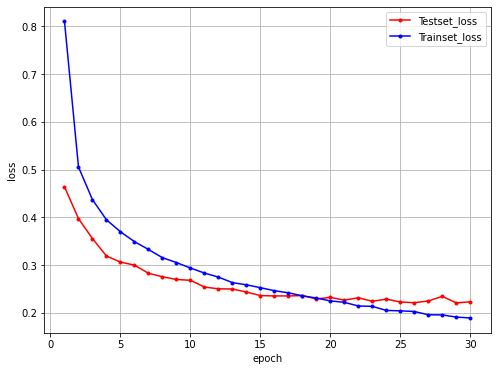

In [23]:
# 그래프로 표현
x_len = np.arange(1, len(y_loss)+1)
plt.figure(figsize=(8,6))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
# plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()